A liga ternária mais cara do mundo
========================================



## Introdução



Para esse problema, consideramos que uma liga ternária é um material formado por três elementos e a quantidade de cada elemento em massa, de forma que a massa total é 100g. Além disso consideramos que a massa de cada elemento na liga é pelo menos 5g. Cada elemento possui um preço por massa, então o preço da liga é a soma da massa de cada elemento multiplicada pelo seu respectivo preço. Para a resolução do problema, escreveremos as ligas na forma de dicionário, por exemplo:

liga = {'Ba': 10.6, 'Am': 34.4, 'Ho': 55.0}

## Objetivo



O objetivo do experimento é escrever um algoritmo genético para encontrar a liga ternária mais cara possível. Os elementos possíveis e seus respectivos preços estão armazenados em um dicionário no arquivo constantes.py

## Importações



In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from funcoes import populacao_inicial_liga
from funcoes import funcao_objetivo_pop_liga
from funcoes import selecao_torneio_max
from funcoes import cruzamento_liga as funcao_cruzamento
from funcoes import mutacao_elemento_liga 
from funcoes import mutacao_quantidades_liga
from funcoes import preco_liga
import constantes

## Códigos e discussão



In [2]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 100
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3
NUM_GERACOES = 200

# relacionadas ao problema a ser resulvido
PRECO = constantes.PRECO
ELEMENTOS = list(PRECO.keys())
NUM_GENES = 3

In [3]:
# funções locais (para não ter que colocar as variaveis locais no script)

def cria_populacao_inicial(tamanho, tamanho_liga):
    return populacao_inicial_liga(tamanho, tamanho_liga, ELEMENTOS)

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_liga(populacao, PRECO)

def funcao_selecao(populacao, fitness):
    return selecao_torneio_max(populacao, fitness, NUM_COMBATENTES_NO_TORNEIO)

def mutacao(individuo):
    return mutacao_elemento_liga(individuo,ELEMENTOS)

Progresso da liga mais cara já vista:
{'Np': 5.872678187243152, 'Sb': 27.770635855461364, 'Po': 66.35668595729548} - fitness: 3264748952975.066
{'Bk': 5.872678187243152, 'Ac': 27.770635855461364, 'Po': 66.35668595729548} - fitness: 4071183834371.957
{'Rh': 7.701359436692691, 'Ac': 22.84647860507906, 'Po': 69.45216195822826} - fitness: 4079594249024.223
{'Rh': 9.090996284654482, 'Ac': 18.747508714986083, 'Po': 72.16149500035942} - fitness: 4094023308088.6562
{'Rh': 9.258538468161593, 'Po': 72.93067231515741, 'Ac': 17.81078921668098} - fitness: 4104701966550.4985
{'Rh': 9.264548155409017, 'Ac': 8.140225761276858, 'Po': 82.59522608331412} - fitness: 4299751671737.972
{'Ac': 9.264548155409017, 'Rh': 8.140225761276858, 'Po': 82.59522608331412} - fitness: 4332357021002.5293
{'Po': 86.10978772219025, 'Ac': 8.678473010603916, 'Rh': 5.2117392672058465} - fitness: 4488277274005.399

Liga mais cara já encontrada:
{'Rh': 86.10978772219025, 'F': 8.678473010603916, 'Mg': 5.2117392672058465}



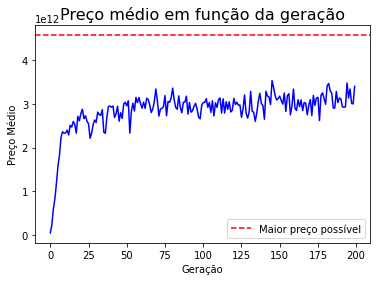

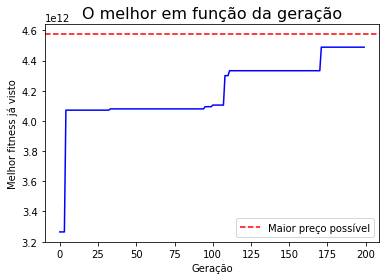

In [4]:
populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES)

melhor_fitness_ja_visto = 0

print("Progresso da liga mais cara já vista:")

lista_fitness_medio = []
lista_melhor_fitness = []
for _ in range(NUM_GERACOES):
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    fitness_medio = np.average(fitness)
    lista_fitness_medio.append(fitness_medio)
    populacao = funcao_selecao(populacao, fitness)

    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]

    contador = 0

    for pai, mae in zip(pais, maes):
        if rd.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        contador = contador + 2
    # Mutação
    for n in range(len(populacao)):
        if rd.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = mutacao_quantidades_liga(individuo)
        if rd.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = mutacao(individuo)
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness
        print(melhor_individuo_ja_visto, "- fitness:", melhor_fitness_ja_visto)
    lista_melhor_fitness.append(melhor_fitness_ja_visto)
print()
print("Liga mais cara já encontrada:")
print(melhor_individuo_ja_visto)
print()

fig, ax1 = plt.subplots(1, 1)
ax1.plot(range(len(lista_fitness_medio)), lista_fitness_medio, c="b")
ax1.axhline(y=4573925000000.0, c="r", linestyle="--", label="Maior preço possível")
ax1.set_xlabel("Geração")
ax1.set_ylabel("Preço Médio")
ax1.set_title("Preço médio em função da geração", fontsize=16)
ax1.legend()

fig, ax2 = plt.subplots(1, 1)
ax2.plot(range(len(lista_melhor_fitness)), lista_melhor_fitness, c="b")
ax2.axhline(y=4573925000000.0, c="r", linestyle="--", label="Maior preço possível")
ax2.set_xlabel("Geração")
ax2.set_ylabel("Melhor fitness já visto")
ax2.set_title("O melhor em função da geração", fontsize=16)
ax2.legend()

## Conclusão



Para resolver o problema, utilizei a mesma estratégia que a do problema da senhas, ou seja, uma função para gerar um gene, que é um dicionário contendo elemento e sua quantidade sorteada de 0 a 100. Depois uma função que gera um indivíduo a partir de três genes. Para isso, a função indivíduo precisa "normalizar" as massas para que a soma seja 100. Uma dificuldade para isso é que é preciso que cada massa seja pelo menos 5g, então para isso eu fiz um loop que sorteia e normaliza as quantidades e se alguma der menor que 5 o processo se repete, até que todas sejam maior que 5. Depois, a função que gera uma população é exatamente igual à do problema da senha, só que trocando a função de indivíduo senha pela indivíduo liga. <br>
<br>
Para a seleção, escolhi a seleção torneio, que já tinha a função, só tive que modificá-la para maximizar ao invés de minimizar. As mutações foram separadas em duas funções, uma que troca um dos elementos da liga (mantendo as quantidades), e outra que muda as quantidades (mantendo os elementos). Para fazer o cruzamento, não foi possível usar o cruzamento de ponto simples pois duas ligas podem ter um elemento em comum, então o resultado pode ser um dicionário com dois valores, então o que eu fiz foi fazer um conjunto com todos os elementos de ambas as ligas e sortear três elementos desse conjunto duas vezes. Isso faz com que possa gerar duas ligas iguais, por exemplo, mas resolve o problema dos elementos repetidos. <br>
<br>
Por fim, a função objetivo é simplesmente o preço da liga, que é calculado multiplicando cada quantidade pelo preço do respectivo elemento e somar. Depois disso a única coisa que eu fiz foi acrescentar no script linhas que salvam uma lista com o fitness médio da população em cada geração, e uma lista com o melhor fitness já visto em cada geração, e plota os gráficos usando matplotlib.